In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()

In [7]:

start_date = datetime.datetime(2020,1,1)
end_date = datetime.datetime(2023,9,20)

def get_stock_price(ticker):
    prices = web.get_data_yahoo(ticker,start_date,end_date)
    prices = prices["Adj Close"].dropna(how="all") 
    return prices


ticker_list = ['INFY.NS','TCS.NS','TATAMOTORS.NS','MARUTI.NS',
	'SUNPHARMA.NS','CIPLA.NS','ITC.NS','MARICO.NS','GOLDBEES.NS']
data = get_stock_price(ticker_list)
data.to_csv("yahoo_stock.csv", index=True)

[*********************100%%**********************]  9 of 9 completed


In [2]:
fig = px.line(data, title="Stock price")
fig.show()

c:\Users\infam\OneDrive\Desktop\task\portfolio project\02- stock portfolio\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


asset allocation with  Mean Variance Method portfolio optimization:
calculating expectedf returns and variance-covariance matrix

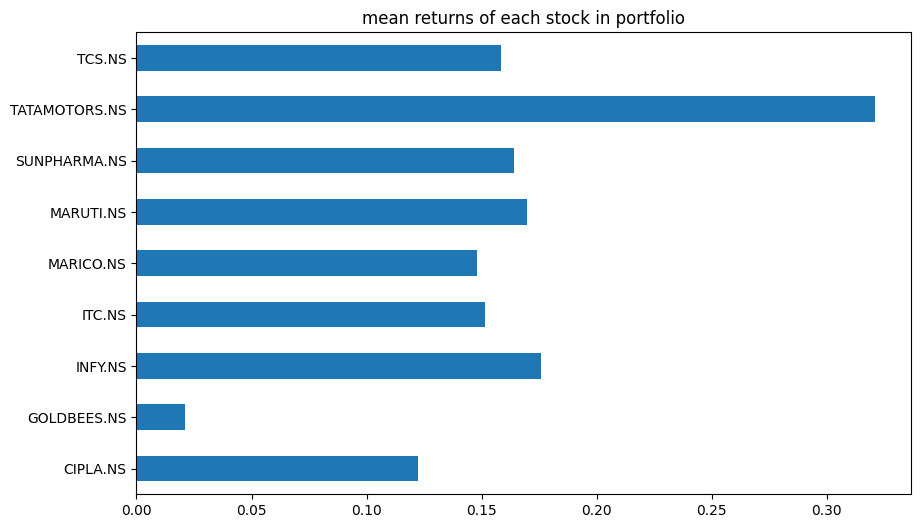

In [3]:
mu = expected_returns.capm_return(data)
mu.plot.barh(figsize=(10,6))
plt.title("mean returns of each stock in portfolio")
plt.show()

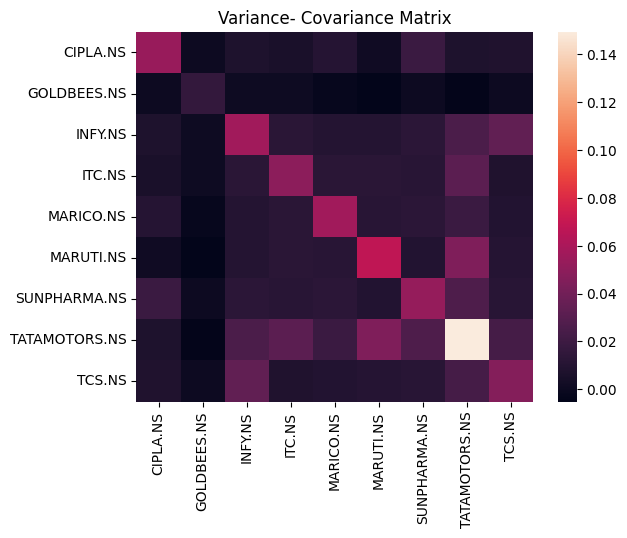

In [4]:
S = risk_models.CovarianceShrinkage(data).ledoit_wolf()
fig = sns.heatmap(S)
plt.title("Variance- Covariance Matrix")
plt.show()

 the diagonal representing the variance and the rest of the color tiles representing the covariances. Lower value  indicates that the stocks are least similar. then we perform the weight optimization:

In [5]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print("optimom weights for stocks:")
print(dict(cleaned_weights))
ef.portfolio_performance(verbose=True)

optimom weights for stocks:
{'CIPLA.NS': 0.1122, 'GOLDBEES.NS': 0.0905, 'INFY.NS': 0.11603, 'ITC.NS': 0.11287, 'MARICO.NS': 0.11263, 'MARUTI.NS': 0.11094, 'SUNPHARMA.NS': 0.11454, 'TATAMOTORS.NS': 0.11785, 'TCS.NS': 0.11243}
Expected annual return: 16.3%
Annual volatility: 13.3%
Sharpe Ratio: 1.08


(0.1630481323182795, 0.1330188896345215, 1.0753971312744681)

computing the share of each stock, for instance we are going to invest 100000$ in these stocks:

In [6]:
latest_prices = get_latest_prices(data)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: {:.2f}$".format(leftover))

Discrete allocation: {'TATAMOTORS.NS': 288, 'INFY.NS': 86, 'SUNPHARMA.NS': 116, 'ITC.NS': 296, 'MARICO.NS': 238, 'TCS.NS': 36, 'CIPLA.NS': 128, 'MARUTI.NS': 13, 'GOLDBEES.NS': 1785}
Funds remaining: 6040.19$
